In [ ]:

from comet_ml import Experiment
from comet_ml.integration.pytorch import log_model
#find in comet ml
experiment = Experiment(
  api_key=" ",
  project_name="yolo",
  workspace=""
)

In [ ]:

import os 
#for problem with matplotlib
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import numpy as np
import cv2
import torch
from matplotlib import pyplot as plt

In [22]:
#!git pull https://github.com/ultralytics/yolov5
#for updating

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!pip install -r yolov5/requirements.txt

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [21]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [9]:
img = 'https://media.istockphoto.com/id/148421596/photo/traffic-jam-with-rows-of-cars.jpg?s=612x612&w=0&k=20&c=GeldRtTNo_vMfE7aHxhQY0QoV2DMyzi4LqTOLZL5svc='
results = model(img)
results.print()

WARNING  NMS time limit 0.550s exceeded
image 1/1: 408x612 13 cars, 2 trucks, 1 traffic light
Speed: 1231.6ms pre-process, 471.1ms inference, 1532.4ms NMS per image at shape (1, 3, 448, 640)


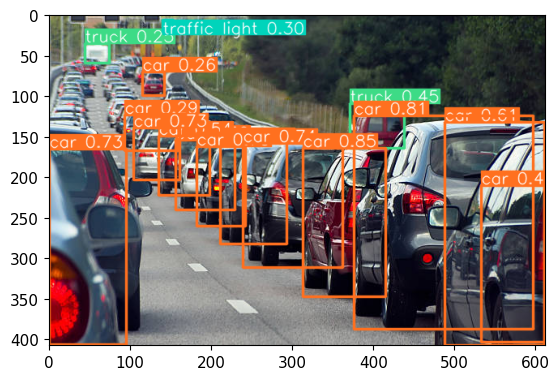

In [4]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [19]:
import uuid
import os
import time


Make dataset using webcam

In [10]:
imges=os.path.join("data", "images")
labels=['a_major','a_minor',
       'b_major','b_minor',
       'c_major','c_minor',
       'd_major','d_minor',
       'e_major','e_minor',
       'f_major','f_minor',
       'g_major','g_minor']

numb_imgs=30

In [ ]:
time_sleep=13
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 13 second delay between captures
        time.sleep(time_sleep)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

Installing torch

In [5]:
torch. __version__

'2.1.0+cu118'

In [ ]:

!pip3 install torch==2.1.0+cu118 torchvision==0.16.0+cu118 torchaudio===2.1.0+cu118 -f https://download.pytorch.org/whl/cu118/torch_stable.html --user

In [ ]:
!pip install tensorflow --user

import tensorflow as tf

In [ ]:
!pip install comet_ml

Training

In [ ]:
#torch.cuda.set_device(0)

!cd yolov5 && python train.py --img 640 --batch 16 --epochs 400 --data custom.yaml --weights yolov5s.pt --workers 2

In [ ]:
#end comet exp
experiment.end()


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp29/weights/last.pt', force_reload=True)

In [ ]:
img = os.path.join('data', 'images', 'g_minor_0.jpg')
img

In [ ]:

results = model(img)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

Make prediction

In [44]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
from utils.plots import plot_results
plot_results('yolov5/runs/train/exp29/results.csv')
